# Problem Statement
The volatility of crude oil prices, driven by a complex interplay of geopolitical events, supply-demand dynamics, and economic factors, poses significant challenges for stakeholders in industries reliant on oil. Accurate prediction of crude oil prices can provide a competitive edge, enabling companies to make informed decisions related to procurement, pricing strategies, risk management, and investment. This project aims to develop a predictive model using Long Short-Term Memory (LSTM) neural networks to forecast Brent Crude Oil and NY Crude Oil prices based on historical data.

# Objectives
1. **Data Collection and Preprocessing:**
   - Collect historical price data for Brent Crude Oil and NY Crude Oil using reliable sources like Yahoo Finance.
   - Perform data cleaning and preprocessing, including handling missing values and scaling the data for use in the LSTM model.

2. **Model Development:**
   - Develop LSTM-based models to predict the future prices of Brent and NY Crude Oil.
   - Implement multiple LSTM layers with appropriate dropout layers to prevent overfitting and enhance the model's ability to generalize.

3. **Model Evaluation:**
   - Evaluate the performance of the LSTM models using appropriate metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).
   - Compare the model's predictions with actual historical prices to assess accuracy and reliability.

4. **Future Price Prediction:**
   - Use the trained model to predict future crude oil prices over a specified period.
   - Analyze the predicted price trends and their implications for stakeholders.

5. **Visualization and Reporting:**
   - Visualize the original, predicted, and future prices using plots to illustrate the model's performance.
   - Prepare a comprehensive report detailing the methodology, model performance, and insights derived from the predictions.

# Business Impacts
1. **Informed Decision-Making:**
   - Companies can use the predicted oil prices to make informed decisions on procurement, inventory management, and pricing strategies, reducing the risk of financial losses due to price volatility.

2. **Risk Management:**
   - Predictive analytics on crude oil prices enable companies to hedge against unfavorable price movements, optimizing risk management strategies and protecting profit margins.

3. **Investment Strategies:**
   - Investors can leverage the model's predictions to make timely decisions on buying or selling oil-related assets, improving portfolio performance and returns.

4. **Operational Efficiency:**
   - For industries heavily reliant on crude oil, such as transportation and manufacturing, accurate price forecasts allow for better budgeting and cost management, leading to improved operational efficiency.

5. **Strategic Planning:**
   - Long-term strategic planning for companies in the energy sector can be enhanced by using predictive models to anticipate market trends, ensuring they remain competitive in a dynamic market environment.

6. **Regulatory and Compliance Preparedness:**
   - Understanding potential future price trends helps companies prepare for regulatory changes and ensure compliance with financial reporting requirements related to asset valuations and risk disclosures.

By accurately predicting crude oil prices, this project can significantly enhance decision-making capabilities, reduce financial risks, and improve strategic planning for businesses across various sectors.

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

# Setting the Duration of Analysis

In [ ]:
start = '2014-01-01'
end = '2024-08-09'

# **Brent Crude Oil**

## Downloading the Data

In [ ]:
brent_crude = yf.download('BZ=F', start=start, end=end)
brent_crude.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,110.800003,111.320000,107.690002,107.779999,107.779999,5131
2014-01-03,107.919998,108.620003,106.779999,106.889999,106.889999,5641
2014-01-06,107.040001,107.949997,106.580002,106.730003,106.730003,7015
2014-01-07,107.180000,107.709999,106.910004,107.349998,107.349998,4075
2014-01-08,107.449997,107.919998,107.010002,107.150002,107.150002,5124


In [ ]:
brent_crude.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,80.040001,80.449997,76.419998,76.809998,76.809998,58894
2024-08-05,77.440002,77.750000,75.050003,76.300003,76.300003,59442
2024-08-06,77.230003,77.800003,75.589996,76.480003,76.480003,45238
2024-08-07,76.199997,78.860001,75.949997,78.330002,78.330002,49730
2024-08-08,78.480003,79.370003,77.629997,79.160004,79.160004,40462


In [ ]:
brent_crude.shape

(2660, 6)

In [ ]:
brent_crude.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2660 entries, 2014-01-02 to 2024-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2660 non-null   float64
 1   High       2660 non-null   float64
 2   Low        2660 non-null   float64
 3   Close      2660 non-null   float64
 4   Adj Close  2660 non-null   float64
 5   Volume     2660 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 145.5 KB


### Resetting the Index

In [ ]:
brent_crude.reset_index(inplace = True)
brent_crude.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,110.800003,111.320000,107.690002,107.779999,107.779999,5131
1,2014-01-03,107.919998,108.620003,106.779999,106.889999,106.889999,5641
2,2014-01-06,107.040001,107.949997,106.580002,106.730003,106.730003,7015
3,2014-01-07,107.180000,107.709999,106.910004,107.349998,107.349998,4075
4,2014-01-08,107.449997,107.919998,107.010002,107.150002,107.150002,5124


### Dropping 'Date' & 'Adj Close' Columns

In [ ]:
brent_crude.drop(['Date','Adj Close'], axis=1, inplace=True)
brent_crude.head()

,Open,High,Low,Close,Volume
0,110.800003,111.320000,107.690002,107.779999,5131
1,107.919998,108.620003,106.779999,106.889999,5641
2,107.040001,107.949997,106.580002,106.730003,7015
3,107.180000,107.709999,106.910004,107.349998,4075
4,107.449997,107.919998,107.010002,107.150002,5124


### Visualizing the 'Close' Price History

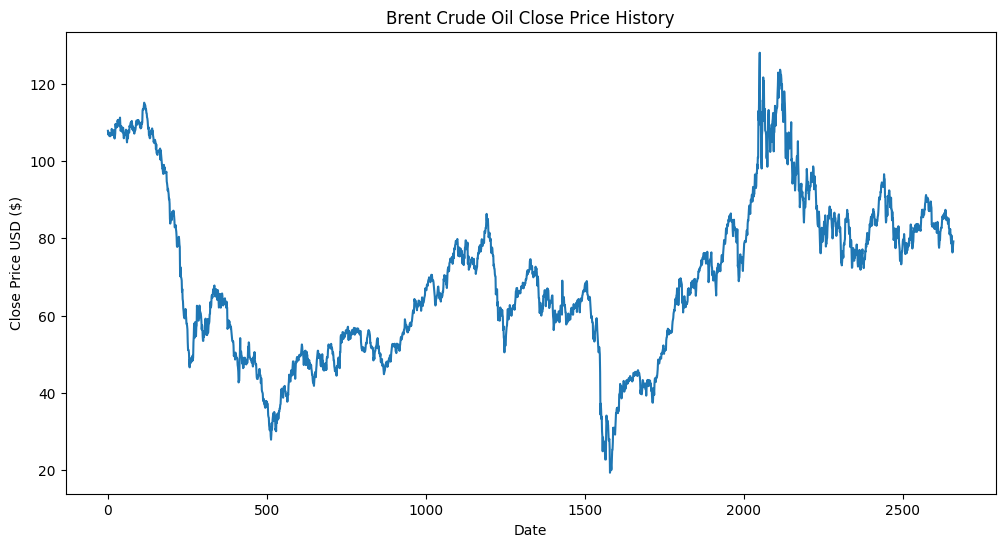

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(brent_crude['Close'])
plt.title('Brent Crude Oil Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

### Interpretation of the Plot

The plot you provided is a line chart displaying the historical close prices of Brent Crude Oil in USD ($). Here's a detailed explanation of the elements shown in the plot:

1. **Title**:
   - The plot is titled "**Brent Crude Oil Close Price History**", indicating that it shows the historical price data of Brent Crude Oil.

2. **X-Axis (Date)**:
   - The x-axis represents time, labeled as "Date." However, the specific dates are not shown; instead, the axis is numbered, likely corresponding to the index of the data points in the dataset.

3. **Y-Axis (Close Price USD ($))**:
   - The y-axis represents the closing prices of Brent Crude Oil in US dollars, ranging approximately from 20 to 120 USD. These prices show the value of Brent Crude Oil at the end of trading sessions over time.

4. **Line Plot**:
   - The line plot visualizes the trend of Brent Crude Oil prices over time. The fluctuations in the line represent the rise and fall of oil prices, showing periods of increase and decrease. For example:
     - There's a noticeable decline from around 120 USD to around 40 USD, indicating a significant drop in oil prices.
     - A subsequent rise to over 100 USD suggests a recovery in prices.
     - The line also shows other periods of volatility and trends in the data.

This plot can be used to analyze trends, identify periods of high volatility, and potentially correlate these movements with historical events or economic conditions that influenced Brent Crude Oil prices.

## Rolling Average for 100 Days

In [ ]:
ma100 = brent_crude['Close'].rolling(100).mean()
ma100.isnull().sum()

99

### Visualizing with Rolling Average for 100 Days

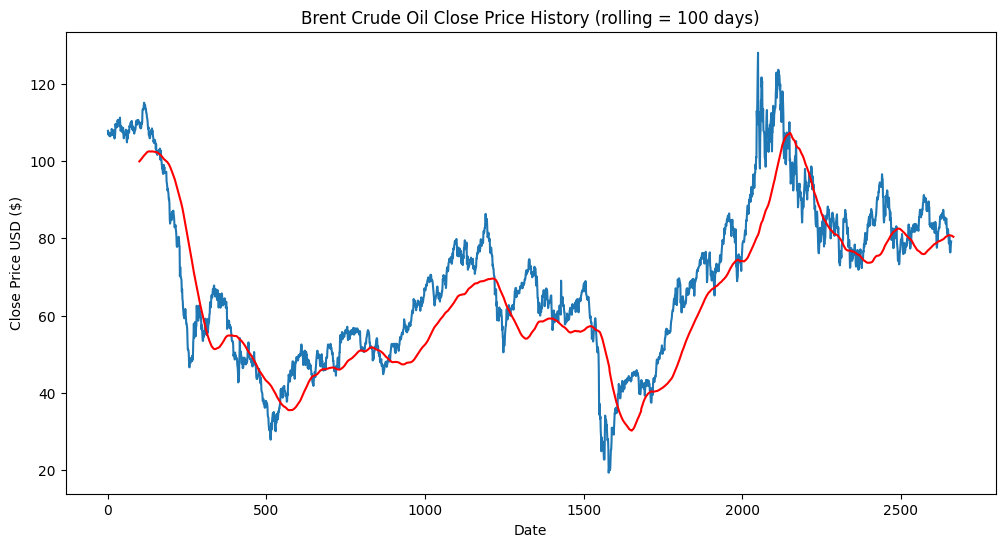

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(brent_crude['Close'])
plt.title('Brent Crude Oil Close Price History (rolling = 100 days)')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(ma100, 'r')
plt.show()

### Interpretation of the Plot

The plot is an enhanced version of the previous Brent Crude Oil close price history chart, with an additional red line overlaid. Here’s an explanation of what this plot represents:

1. **Original Line Plot (Blue)**:
   - As in the previous chart, the blue line represents the historical close prices of Brent Crude Oil in USD ($) over time. This shows the daily fluctuations in the price.

2. **Rolling Average (Red Line)**:
   - The red line represents a rolling (or moving) average of the close prices. The plot title indicates that the rolling average is calculated over 100 days (`rolling = 100 days`).
   - A rolling average smooths out short-term fluctuations and highlights longer-term trends or cycles in the data. It is calculated by taking the average of the closing prices over the last 100 days at each point on the x-axis.
   - For instance, at each point on the red line, the value represents the average close price of the preceding 100 days, which helps to visualize the underlying trend without the noise of daily price variations.

**Key Observations**:
- **Smoothing Effect**: The red rolling average line is smoother than the original blue line, removing short-term volatility and showing a clearer trend over time.
- **Trend Analysis**: The red line helps in understanding the broader trend of Brent Crude Oil prices over the period. For example, when the red line is sloping downward, it indicates a general decrease in prices over the observed period, and an upward slope indicates a price increase.
- **Lagging Indicator**: Since the rolling average is based on past data (100 days in this case), it lags behind the actual price movements, especially at points where there are sharp spikes or drops in the blue line.

This plot is useful for analysts and traders to understand the overall trend in Brent Crude Oil prices, make more informed decisions, and reduce the impact of day-to-day volatility.

## Rolling Average for 200 Days

In [ ]:
ma200 = brent_crude['Close'].rolling(200).mean()
ma200.isnull().sum()

199

### Visualizing with Rolling Averages for both 100 & 200 Days

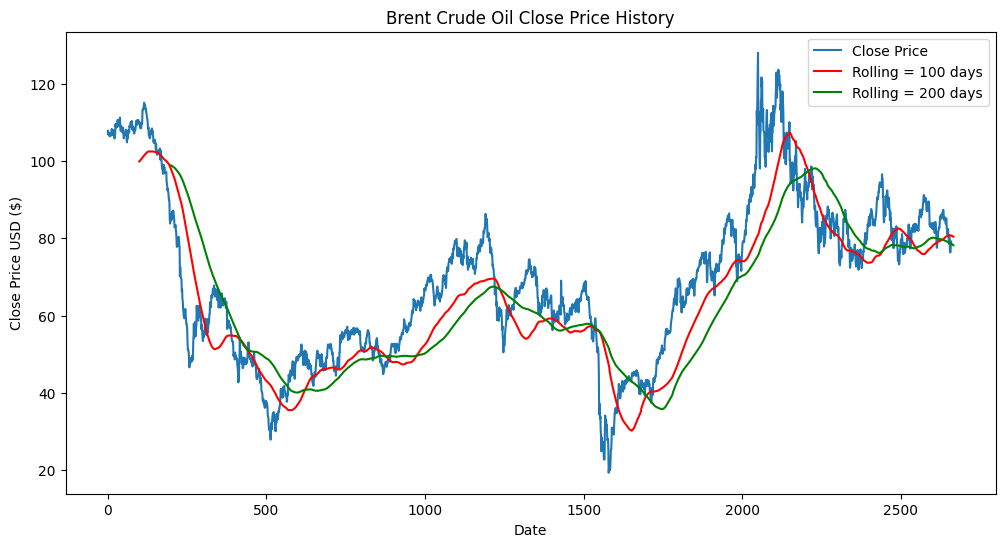

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(brent_crude['Close'], label='Close Price')
plt.title('Brent Crude Oil Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

plt.plot(ma100, 'r', label='Rolling = 100 days')
plt.plot(ma200, 'g', label='Rolling = 200 days')

plt.legend()
plt.show()

### Interpretation of the Plot

This plot builds upon the previous ones by adding another layer of analysis through the inclusion of two different rolling averages: one calculated over 100 days and another over 200 days. Here's a breakdown of what this plot represents:

**Components of the Plot**:

1. **Original Line Plot (Blue)**:
   - As in the previous charts, the blue line represents the daily historical close prices of Brent Crude Oil in USD ($). It shows the day-to-day fluctuations in the oil price.

2. **100-Day Rolling Average (Red Line)**:
   - The red line shows the 100-day rolling average of the close prices. This is a shorter-term trend indicator, smoothing out the price fluctuations by averaging the closing prices over the past 100 days.

3. **200-Day Rolling Average (Green Line)**:
   - The green line represents the 200-day rolling average of the close prices. This is a longer-term trend indicator, which further smooths the data and provides a broader view of the trend over a more extended period compared to the 100-day average.

**Key Observations**:

- **Short-Term vs. Long-Term Trends**:
  - The red (100-day) and green (200-day) lines give a visual comparison of the short-term and long-term trends. The 100-day rolling average reacts more quickly to recent price changes, showing more immediate shifts, while the 200-day rolling average changes more gradually, reflecting broader trends.

- **Crossovers**:
  - Points where the red and green lines cross each other (known as crossovers) can be significant in technical analysis. For example:
    - When the red line (short-term average) crosses above the green line (long-term average), it may indicate a potential uptrend (often referred to as a "golden cross").
    - Conversely, when the red line crosses below the green line, it may suggest a potential downtrend (often called a "death cross").

- **Volatility and Smoothing**:
  - The blue line shows the raw price data, which includes all the day-to-day volatility. The red and green lines smooth out this volatility, with the green line showing an even more smoothed view compared to the red line.


**Purpose of the Plot**:
This plot is useful for investors and analysts who want to compare short-term and long-term trends in Brent Crude Oil prices. The rolling averages help in identifying the underlying trends more clearly, allowing for better-informed decisions about buying, holding, or selling based on the price momentum and potential trend reversals.

## Train-Test Split

In [ ]:
split_index = int(0.7 * len(brent_crude))

train_df = brent_crude['Close'].iloc[:split_index]
test_df = brent_crude['Close'].iloc[split_index:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1861,)
Testing set shape: (799,)


In [ ]:
train_df.head()

,Close
0,107.779999
1,106.889999
2,106.730003
3,107.349998
4,107.150002


In [ ]:
test_df.head()

,Close
1861,72.220001
1862,72.220001
1863,72.519997
1864,72.690002
1865,72.860001


## Scaling the Data

In [ ]:
scaler_1 = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_array = scaler_1.fit_transform(np.array(train_df).reshape(-1,1))
train_array[:5]

array([[0.92395279],
       [0.91465582],
       [0.91298449],
       [0.91946099],
       [0.91737181]])

In [ ]:
test_array = scaler_1.transform(np.array(test_df).reshape(-1,1))
test_array[:5]

array([[0.55249141],
       [0.55249141],
       [0.55562518],
       [0.55740106],
       [0.55917687]])

In [ ]:
x_train_1 = []
y_train_1 = []

for i in range(100, train_array.shape[0]):
    x_train_1.append(train_array[i-100: i])
    y_train_1.append(train_array[i, 0])

x_train_1, y_train_1 = np.array(x_train_1), np.array(y_train_1)

In [ ]:
x_train_1.shape

(1761, 100, 1)

## Running the Model

In [ ]:
model_1 = Sequential()
model_1.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train_1.shape[1], 1)))
model_1.add(Dropout(0.2))

model_1.add(LSTM(units=60, activation='relu', return_sequences=True))
model_1.add(Dropout(0.3))

model_1.add(LSTM(units=80, activation='relu', return_sequences=True))
model_1.add(Dropout(0.4))

model_1.add(LSTM(units=120, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(units=1))

### Model Summary

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

This output represents the summary of a Sequential model in Keras, specifically an LSTM-based neural network. The summary includes details about each layer in the model, the output shape after each layer, and the number of trainable parameters in each layer. Here's a breakdown of the model:

**Layers Overview**:

1. **LSTM Layer (1st Layer) - `lstm`:**
   - **Type:** LSTM (Long Short-Term Memory)
   - **Output Shape:** `(None, 100, 50)`
     - `None` indicates that the batch size is flexible.
     - `100` is the sequence length.
     - `50` is the number of units in the LSTM layer.
   - **Parameters (`Param #`):** `10,400`
     - This is the number of trainable parameters in the LSTM layer, calculated based on the input size, output size, and the LSTM architecture (including weights for input, hidden states, and biases).

2. **Dropout Layer (1st Layer) - `dropout`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 100, 50)`
     - The output shape remains the same as the previous LSTM layer.
   - **Parameters:** `0`
     - Dropout layers have no trainable parameters; they simply drop a fraction of units during training to prevent overfitting.

3. **LSTM Layer (2nd Layer) - `lstm_1`:**
   - **Type:** LSTM
   - **Output Shape:** `(None, 100, 60)`
     - The sequence length remains 100, but the number of units has increased to 60.
   - **Parameters:** `26,640`
     - This is calculated similarly to the first LSTM layer but with 60 units.

4. **Dropout Layer (2nd Layer) - `dropout_1`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 100, 60)`
     - The output shape is unchanged.
   - **Parameters:** `0`
     - No trainable parameters.

5. **LSTM Layer (3rd Layer) - `lstm_2`:**
   - **Type:** LSTM
   - **Output Shape:** `(None, 100, 80)`
     - The number of units is increased to 80.
   - **Parameters:** `45,120`
     - This is calculated similarly to previous LSTM layers but with 80 units.

6. **Dropout Layer (3rd Layer) - `dropout_2`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 100, 80)`
     - No change in output shape.
   - **Parameters:** `0`
     - No trainable parameters.

7. **LSTM Layer (4th Layer) - `lstm_3`:**
   - **Type:** LSTM
   - **Output Shape:** `(None, 120)`
     - This layer outputs a sequence with 120 units, but notice the absence of the sequence length (`100` is gone). This indicates that `return_sequences=False` for this layer, so only the final output is returned.
   - **Parameters:** `96,480`
     - The number of trainable parameters is higher due to the larger output size.

8. **Dropout Layer (4th Layer) - `dropout_3`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 120)`
     - No change in output shape.
   - **Parameters:** `0`
     - No trainable parameters.

9. **Dense Layer - `dense`:**
   - **Type:** Dense (Fully Connected Layer)
   - **Output Shape:** `(None, 1)`
     - This layer reduces the output to a single unit, which is likely used for regression (predicting a continuous value).
   - **Parameters:** `121`
     - Calculated based on 120 input units and 1 output unit, plus the bias term.

**Total Parameters**:

- **Total Parameters:** `178,761`
  - This is the sum of all the parameters in the model that can be trained.

- **Trainable Parameters:** `178,761`
  - All parameters in this model are trainable.

- **Non-Trainable Parameters:** `0`
  - There are no non-trainable parameters, meaning all layers are being updated during training.

This model is a multi-layer LSTM network with Dropout layers added to prevent overfitting. The LSTM layers capture temporal dependencies in the data, while the final Dense layer outputs a single value, which is likely the predicted value. The model is designed to handle sequential data with a time series-like structure.

In [ ]:
model_1.compile(optimizer='adam', loss='mean_squared_error')
model_1.fit(x_train_1, y_train_1, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - loss: 0.0800
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0097
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0083
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0124
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0071
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0063
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0057
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0052
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0049
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0051
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0053
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0052
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0043
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0035
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0040
Ep

### Saving the Model

In [ ]:
model_1.save('brent_crude_model.h5')

## Testing the Model

In [ ]:
past_100_days = train_df.tail(100)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,Close
0,56.580002
1,56.060001
2,56.419998
3,55.099998
4,55.900002


In [ ]:
input_data_1 = scaler_1.fit_transform(final_df.values.reshape(-1, 1))
input_data_1 = pd.DataFrame(input_data_1, columns=[final_df.name])
input_data_1.head()

,Close
0,0.020307
1,0.013172
2,0.018112
3,0.000000
4,0.010977


In [ ]:
input_data_1.shape

(899, 1)

In [ ]:
x_test_1 = []
y_test_1 = []

input_data_1 = np.array(input_data_1)
for i in range(100, input_data_1.shape[0]):
    x_test_1.append(input_data_1[i-100: i])
    y_test_1.append(input_data_1[i, 0])

In [ ]:
x_test_1, y_test_1 = np.array(x_test_1), np.array(y_test_1)
print(x_test_1.shape)
print(y_test_1.shape)

(799, 100, 1)
(799,)


In [ ]:
y_pred_1 = model_1.predict(x_test_1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step


In [ ]:
y_pred_1.shape

(799, 1)

In [ ]:
scale_factor_1 = 1/scaler_1.scale_
y_pred_1 = y_pred_1 * scale_factor_1
y_test_1 = y_test_1 * scale_factor_1

### Visualizing the Predictions

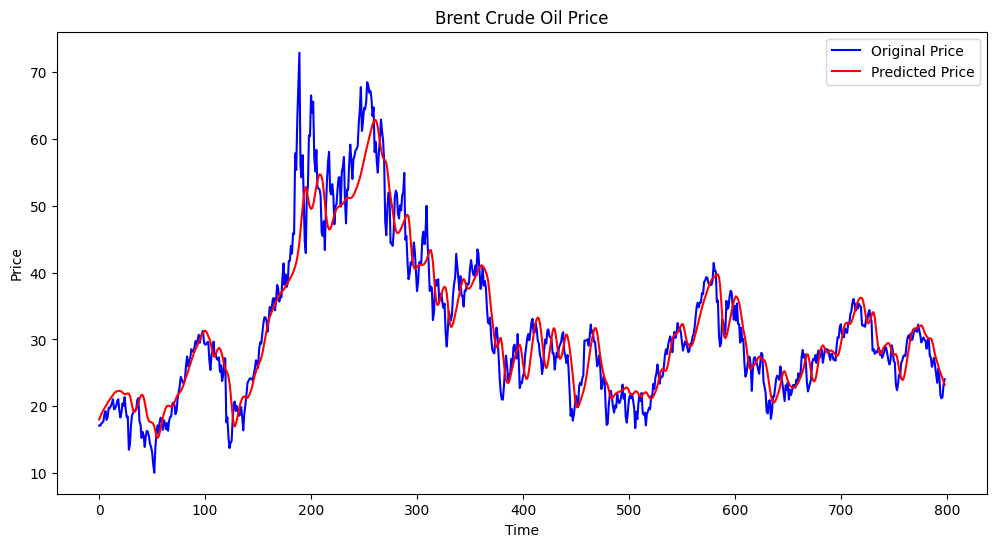

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Brent Crude Oil Price')
plt.plot(y_test_1, 'b', label='Original Price')
plt.plot(y_pred_1, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Interpretation of the Plot

The plot shows a comparison between the original Brent Crude Oil prices and the predicted prices generated by a model. Here's a detailed explanation of the components:

**Components of the Plot**:

1. **Original Price (Blue Line):**
   - The blue line represents the actual historical prices of Brent Crude Oil over time. This is the ground truth data that the model is trying to predict.

2. **Predicted Price (Red Line):**
   - The red line represents the prices predicted by the model. This is the output of the LSTM model (or similar model) after training on historical data.

**Observations**:

- **Overall Trend Matching:**
  - The predicted prices (red line) closely follow the original prices (blue line) throughout the entire time period, indicating that the model has captured the general trend of Brent Crude Oil prices well.

- **Accuracy of Prediction:**
  - The closeness of the red line to the blue line suggests that the model is making accurate predictions. The model seems to handle the volatility and fluctuations in the data reasonably well, especially in periods where the price changes rapidly.

- **Minor Deviations:**
  - There are minor deviations where the red line does not perfectly match the blue line, which is expected in any model prediction. These deviations might be due to the model not fully capturing some complex dynamics or noise in the data.

**Purpose of the Plot**:

- **Model Performance Evaluation:**
  - This plot is likely being used to visually evaluate the performance of the prediction model. The closer the predicted prices are to the actual prices, the better the model is performing.

- **Model Validation:**
  - The plot serves as a validation step, showing how well the model generalizes to unseen data. If the model's predictions consistently match the actual prices, it indicates that the model is robust and can be relied upon for forecasting future prices.

# **NY Crude Oil**

## Downloading the Data

In [ ]:
ny_crude = yf.download('CL=F', start=start, end=end)
ny_crude.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,98.500000,98.970001,95.339996,95.440002,95.440002,251248
2014-01-03,95.470001,95.739998,93.860001,93.959999,93.959999,215522
2014-01-06,94.180000,94.589996,93.199997,93.430000,93.430000,189379
2014-01-07,93.599998,94.220001,93.349998,93.669998,93.669998,177182
2014-01-08,93.959999,94.180000,92.260002,92.330002,92.330002,244855


In [ ]:
ny_crude.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,76.870003,77.290001,72.970001,73.519997,73.519997,467786
2024-08-05,74.209999,74.459999,71.669998,72.940002,72.940002,500151
2024-08-06,73.860001,74.559998,72.199997,73.199997,73.199997,352250
2024-08-07,72.839996,75.839996,72.580002,75.230003,75.230003,427995
2024-08-08,75.470001,76.519997,74.599998,76.190002,76.190002,327301


In [ ]:
ny_crude.shape

(2667, 6)

### Resetting the Index

In [ ]:
ny_crude.reset_index(inplace=True)
ny_crude.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,98.500000,98.970001,95.339996,95.440002,95.440002,251248
1,2014-01-03,95.470001,95.739998,93.860001,93.959999,93.959999,215522
2,2014-01-06,94.180000,94.589996,93.199997,93.430000,93.430000,189379
3,2014-01-07,93.599998,94.220001,93.349998,93.669998,93.669998,177182
4,2014-01-08,93.959999,94.180000,92.260002,92.330002,92.330002,244855


,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2014-01-02,98.500000,98.970001,95.339996,95.440002,95.440002,251248
1,1,2014-01-03,95.470001,95.739998,93.860001,93.959999,93.959999,215522
2,2,2014-01-06,94.180000,94.589996,93.199997,93.430000,93.430000,189379
3,3,2014-01-07,93.599998,94.220001,93.349998,93.669998,93.669998,177182
4,4,2014-01-08,93.959999,94.180000,92.260002,92.330002,92.330002,244855


### Dropping 'Date' & 'Adj Close' Columns

In [ ]:
ny_crude.drop(['Date', 'Adj Close'], axis=1, inplace=True)
ny_crude.head()

,Open,High,Low,Close,Volume
0,98.500000,98.970001,95.339996,95.440002,251248
1,95.470001,95.739998,93.860001,93.959999,215522
2,94.180000,94.589996,93.199997,93.430000,189379
3,93.599998,94.220001,93.349998,93.669998,177182
4,93.959999,94.180000,92.260002,92.330002,244855


### Visualizing the 'Close' Price History

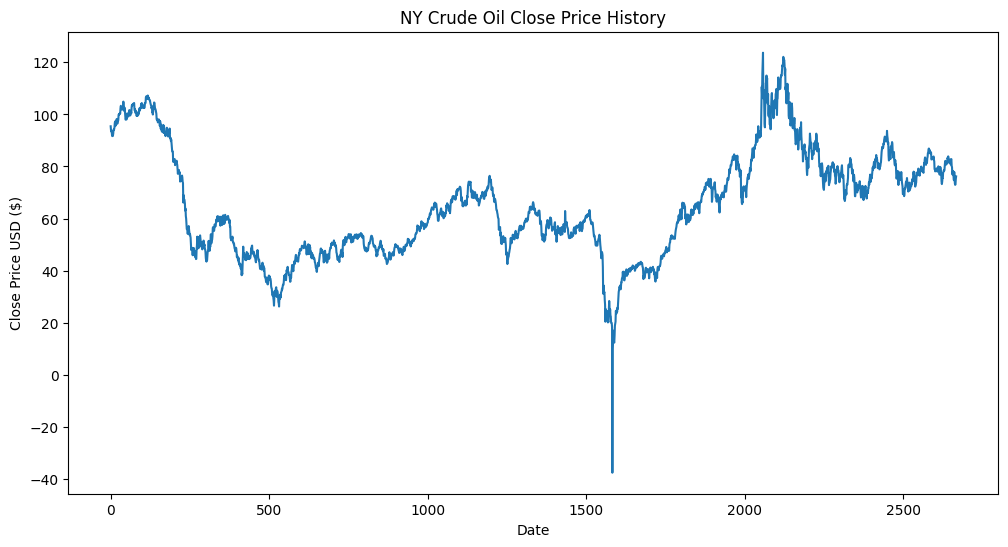

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ny_crude['Close'])
plt.title('NY Crude Oil Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

### Interpretation of the Plot

This plot represents the historical close price of NY Crude Oil (presumably WTI - West Texas Intermediate Crude Oil) over a specific time period. Here's a detailed explanation:

**Components of the Plot**:

1. **Title:**
   - The plot is titled "NY Crude Oil Close Price History," indicating that it shows the historical closing prices of crude oil traded in New York (likely WTI).

2. **X-Axis (Date):**
   - The x-axis represents time, labeled as "Date." The axis is likely indexed by the sequence number of the data points rather than specific dates.

3. **Y-Axis (Close Price USD ($)):**
   - The y-axis represents the closing price of NY Crude Oil in USD. The range of the y-axis is noteworthy because it goes below zero, indicating instances where the price was negative.

4. **Price History (Blue Line):**
   - The blue line represents the daily close prices of NY Crude Oil. It shows how the price has fluctuated over the time period covered by the data.

**Observations**:

- **Negative Prices:**
  - The most striking feature of this plot is the sharp drop in the price to below zero at a certain point in time. This reflects the historical event in April 2020, during the COVID-19 pandemic, when WTI crude oil futures prices turned negative for the first time in history. This unusual situation occurred due to a collapse in demand and storage capacity issues, leading to a scenario where sellers were paying buyers to take the oil off their hands.
  
- **Volatility:**
  - The plot shows significant volatility in crude oil prices, with notable peaks and troughs. The sharp rise and fall around the middle of the plot likely correspond to the periods of high price fluctuations driven by economic, geopolitical, or other market factors.
  
- **Recent Stability:**
  - Toward the right end of the plot, the prices seem to stabilize somewhat, although still with visible fluctuations, indicating a period of recovery or relative stability after the significant disruptions.

**Purpose of the Plot**:
This plot is useful for understanding the historical price movements of NY Crude Oil, particularly the extreme volatility and unprecedented events like the negative pricing scenario. It provides insight into how external factors like global pandemics, economic recessions, or geopolitical tensions can drastically affect oil prices. Analysts and traders use such plots to study historical trends and to prepare for potential future scenarios.

## Rolling Average for 100 Days

In [ ]:
ma100 = ny_crude['Close'].rolling(100).mean()
ma100.isnull().sum()

99

### Visualizing with Rolling Average for 100 Days

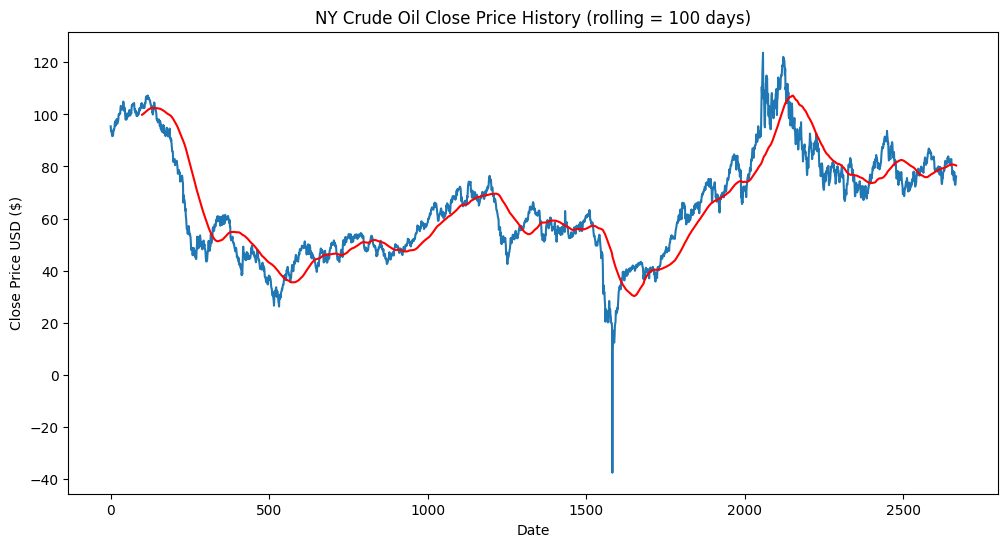

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ny_crude['Close'])
plt.title('NY Crude Oil Close Price History (rolling = 100 days)')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(ma100, 'r')
plt.show()

### Interpretation of the Plot

This plot is an enhanced version of the previous NY Crude Oil close price history chart, with an additional rolling average line included. Here’s a detailed explanation:

**Components of the Plot**:

1. **Original Line Plot (Blue):**
   - The blue line represents the historical daily close prices of NY Crude Oil in USD ($), just like in the previous plot. It captures the volatility and fluctuations in the price over time.

2. **100-Day Rolling Average (Red Line):**
   - The red line represents the 100-day rolling average of the close prices. This line smooths out the short-term fluctuations in the blue line, providing a clearer view of the underlying trend over a longer period.

**Key Observations**:

- **Smoothing Effect:**
  - The rolling average (red line) smooths out the noise in the daily price data (blue line), making it easier to observe the overall trend in crude oil prices. For instance, the sharp peaks and troughs in the blue line are averaged out in the red line.

- **Trend Identification:**
  - The red line helps in identifying long-term trends in the price data. For example, it shows the general decline in prices from the initial high levels, the recovery and peak before the sharp drop during the negative price event, and the stabilization in prices afterward.

- **Negative Price Event:**
  - The plot still captures the unprecedented event where the price dipped below zero, but the rolling average smooths this out, showing how the market adjusted over time rather than focusing on the extreme volatility of that single event.

- **Volatility:**
  - While the blue line shows high volatility with rapid changes in price, the red line indicates that the general trend was more stable, especially over longer periods.

**Purpose of the Plot**:

- **Trend Analysis:**
  - This plot is useful for analyzing the overall trends in NY Crude Oil prices without being distracted by short-term volatility. It helps in understanding the broader market movements and can be used to make informed decisions based on long-term trends.

- **Market Insights:**
  - By observing the rolling average, analysts can gain insights into the market's behavior over time, especially in response to significant events like the price collapse during the COVID-19 pandemic.

In summary, this plot provides a clearer view of the historical price trends of NY Crude Oil by including a rolling average that smooths out the daily fluctuations, helping to focus on the more significant movements in the market.

## Rolling Average for 200 days

In [ ]:
ma200 = ny_crude['Close'].rolling(200).mean()
ma200.isnull().sum()

199

### Visualizing with Rolling Average for 100 & 200 Days

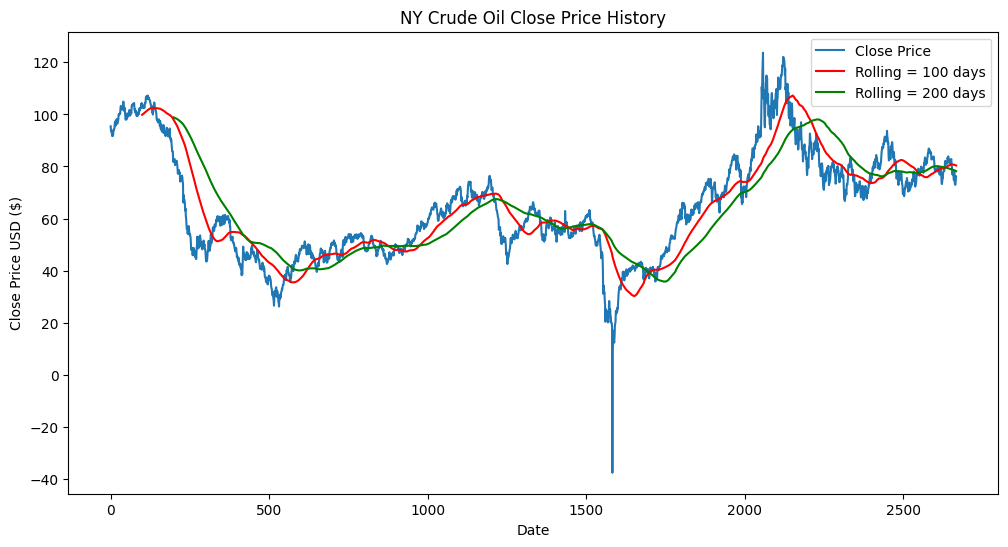

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ny_crude['Close'], label='Close Price')
plt.title('NY Crude Oil Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

plt.plot(ma100, 'r', label='Rolling = 100 days')
plt.plot(ma200, 'g', label='Rolling = 200 days')

plt.legend()
plt.show()

### Interpretation of the Plot

This plot displays the NY Crude Oil close price history, with two additional rolling averages (100-day and 200-day) overlaid on the original price data. Here's a detailed breakdown:

**Components of the Plot**:

1. **Original Price (Blue Line):**
   - The blue line represents the daily historical closing prices of NY Crude Oil in USD ($), capturing the day-to-day fluctuations and overall volatility in the market.

2. **100-Day Rolling Average (Red Line):**
   - The red line represents the 100-day rolling average of the closing prices. This is a short-term moving average that smooths out the daily fluctuations, making it easier to see short-term trends.

3. **200-Day Rolling Average (Green Line):**
   - The green line represents the 200-day rolling average of the closing prices. This is a longer-term moving average, providing a broader view of the overall trend by smoothing out more of the short-term volatility.

**Key Observations**:

- **Short-Term vs. Long-Term Trends:**
  - The red line (100-day rolling average) responds more quickly to changes in the market compared to the green line (200-day rolling average). This is because the 100-day average is more sensitive to recent price movements.
  - The green line, being a longer-term average, smooths out more of the noise and provides a clearer picture of the longer-term trend.

- **Crossovers:**
  - Crossovers between the 100-day and 200-day moving averages can be significant indicators in technical analysis:
    - When the 100-day average crosses above the 200-day average (golden cross), it may signal a bullish trend (uptrend).
    - When the 100-day average crosses below the 200-day average (death cross), it may indicate a bearish trend (downtrend).
  - The plot shows several points where the red and green lines cross, which could be used to identify potential trend reversals.

- **Negative Price Event:**
  - Similar to the previous plots, this one also captures the sharp drop below zero, indicating the unprecedented negative pricing event. The moving averages smooth out this anomaly, showing how the market adjusted afterward.

- **Volatility Analysis:**
  - The original price (blue line) shows significant volatility, with rapid changes in price. The rolling averages (red and green lines) help to reduce this volatility, offering a clearer view of the overall trend without the noise of daily price movements.

**Purpose of the Plot**:

- **Trend Analysis:**
  - This plot is useful for comparing short-term and long-term trends in NY Crude Oil prices. By observing the rolling averages alongside the actual price, analysts can identify potential buy or sell signals based on the crossover points and the general direction of the moving averages.

- **Market Insights:**
  - The combination of short-term and long-term moving averages provides valuable insights into market momentum, helping traders and investors make more informed decisions by understanding both immediate and sustained trends.

In summary, this plot is a powerful tool for technical analysis, offering a layered view of NY Crude Oil price movements by combining actual prices with both short-term and long-term rolling averages. This allows for a more nuanced understanding of market trends and potential turning points.

## Train-Test Split

In [ ]:
split_index = int(0.7 * len(ny_crude))

train_df = ny_crude['Close'].iloc[:split_index]
test_df = ny_crude['Close'].iloc[split_index:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1866,)
Testing set shape: (801,)


In [ ]:
train_df.head()

,Close
0,95.440002
1,93.959999
2,93.430000
3,93.669998
4,92.330002


In [ ]:
test_df.head()

,Close
1866,69.620003
1867,69.230003
1868,70.050003
1869,69.959999
1870,70.290001


## Scaling the Data

In [ ]:
scaler_2 = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_array = scaler_2.fit_transform(np.array(train_df).reshape(-1,1))
train_array[:5]

array([[0.91842087],
       [0.90820621],
       [0.90454827],
       [0.90620468],
       [0.89695631]])

In [ ]:
test_array = scaler_2.transform(np.array(test_df).reshape(-1,1))
test_array[:5]

array([[0.74021673],
       [0.73752503],
       [0.7431845 ],
       [0.74256331],
       [0.74484091]])

In [ ]:
x_train_2 = []
y_train_2 = []

for i in range(100, train_array.shape[0]):
    x_train_2.append(train_array[i-100: i])
    y_train_2.append(train_array[i, 0])

x_train_2, y_train_2 = np.array(x_train_2), np.array(y_train_2)

In [ ]:
x_train_2.shape

(1766, 100, 1)

## Running the Model

In [ ]:
model_2 = Sequential()
model_2.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train_2.shape[1], 1)))
model_2.add(Dropout(0.2))

model_2.add(LSTM(units=60, activation='relu', return_sequences=True))
model_2.add(Dropout(0.3))

model_2.add(LSTM(units=80, activation='relu', return_sequences=True))
model_2.add(Dropout(0.4))

model_2.add(LSTM(units=120, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(units=1))

### Model Summary

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

The output is a summary of a sequential model (built using Keras) named `sequential_1`. This model primarily consists of LSTM layers, which are commonly used for processing sequential data such as time series. Here's a breakdown of the model's architecture:

**Model Layers**:

1. **LSTM Layer (1st Layer) - `lstm_4`:**
   - **Type:** LSTM (Long Short-Term Memory)
   - **Output Shape:** `(None, 100, 50)`
     - `None` indicates the batch size, which is flexible.
     - `100` is the sequence length, meaning the input sequences have 100 time steps.
     - `50` is the number of units (or neurons) in the LSTM layer.
   - **Parameters (`Param #`):** `10,400`
     - This is the total number of trainable parameters in this LSTM layer. These parameters include weights for the input, recurrent weights (connections between neurons in the same layer), and biases.

2. **Dropout Layer (1st Layer) - `dropout_4`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 100, 50)`
     - The output shape is the same as the previous LSTM layer, meaning the dropout layer does not alter the shape of the data but randomly sets a fraction of the input units to 0 during training to prevent overfitting.
   - **Parameters:** `0`
     - Dropout layers do not have trainable parameters.

3. **LSTM Layer (2nd Layer) - `lstm_5`:**
   - **Type:** LSTM
   - **Output Shape:** `(None, 100, 60)`
     - This layer has 60 units, increasing the output dimension.
   - **Parameters:** `26,640`
     - The number of parameters increases due to the larger number of units compared to the first LSTM layer.

4. **Dropout Layer (2nd Layer) - `dropout_5`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 100, 60)`
     - No change in output shape, serving the same purpose as the first dropout layer.
   - **Parameters:** `0`
     - Again, no trainable parameters.

5. **LSTM Layer (3rd Layer) - `lstm_6`:**
   - **Type:** LSTM
   - **Output Shape:** `(None, 100, 80)`
     - This layer further increases the number of units to 80, adding more capacity to capture temporal dependencies.
   - **Parameters:** `45,120`
     - The parameter count increases with the number of units.

6. **Dropout Layer (3rd Layer) - `dropout_6`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 100, 80)`
     - Maintains the output shape of the previous LSTM layer.
   - **Parameters:** `0`
     - No trainable parameters.

7. **LSTM Layer (4th Layer) - `lstm_7`:**
   - **Type:** LSTM
   - **Output Shape:** `(None, 120)`
     - This final LSTM layer outputs 120 units, but notice that the sequence dimension (`100`) is no longer present. This indicates that `return_sequences=False`, meaning this layer outputs only the final state of the sequence.
   - **Parameters:** `96,480`
     - The largest parameter count due to the 120 units, which further increases the model's capacity.

8. **Dropout Layer (4th Layer) - `dropout_7`:**
   - **Type:** Dropout
   - **Output Shape:** `(None, 120)`
     - Maintains the shape from the last LSTM layer.
   - **Parameters:** `0`
     - No trainable parameters.

9. **Dense Layer - `dense_1`:**
   - **Type:** Dense (Fully Connected Layer)
   - **Output Shape:** `(None, 1)`
     - The Dense layer reduces the output to a single value, likely for a regression task where a single continuous output is required (e.g., predicting a future value).
   - **Parameters:** `121`
     - The parameters here come from 120 input connections (from the last LSTM layer) plus a bias term.

**Total Parameters**:

- **Total Parameters:** `178,761`
  - This is the sum of all the trainable parameters across all layers in the model.

- **Trainable Parameters:** `178,761`
  - All parameters in this model are trainable.

- **Non-Trainable Parameters:** `0`
  - There are no non-trainable parameters, indicating that all the parameters are involved in the learning process.

This model is a deep LSTM network designed to process sequential data, like time series. It consists of four LSTM layers, each followed by a dropout layer to prevent overfitting. The model ends with a Dense layer to produce a single output value, likely for a regression task. The model has a total of 178,761 trainable parameters, indicating a relatively complex network capable of capturing intricate patterns in sequential data.

In [ ]:
model_2.compile(optimizer='adam', loss='mean_squared_error')
model_2.fit(x_train_2, y_train_2, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - loss: 0.1552
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0146
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0119
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0093
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0090
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0090
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0094
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0080
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0077
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0075
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0074
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0078
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0071
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0065
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0061
Ep

### Saving the Model

In [ ]:
model_2.save('ny_crude_model.h5')

## Testing the Model

In [ ]:
past_100_days = train_df.tail(100)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,Close
0,52.250000
1,53.209999
2,52.910000
3,53.570000
4,52.360001


In [ ]:
input_data_2 = scaler_2.fit_transform(final_df.values.reshape(-1, 1))
input_data_2 = pd.DataFrame(input_data_2, columns=[final_df.name])
input_data_2.head()

,Close
0,0.000699
1,0.014126
2,0.009930
3,0.019161
4,0.002238


In [ ]:
input_data_2.shape

(901, 1)

In [ ]:
x_test_2 = []
y_test_2 = []

input_data_2 = np.array(input_data_2)
for i in range(100, input_data_2.shape[0]):
    x_test_2.append(input_data_2[i-100: i])
    y_test_2.append(input_data_2[i, 0])

In [ ]:
x_test_2, y_test_2 = np.array(x_test_2), np.array(y_test_2)
print(x_test_2.shape)
print(y_test_2.shape)

(801, 100, 1)
(801,)


In [ ]:
y_pred_2 = model_2.predict(x_test_2)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [ ]:
y_pred_2.shape

(801, 1)

In [ ]:
scale_factor_2 = 1/scaler_2.scale_
y_pred_2 = y_pred_2 * scale_factor_2
y_test_2 = y_test_2 * scale_factor_2

### Visualizing the Predictions

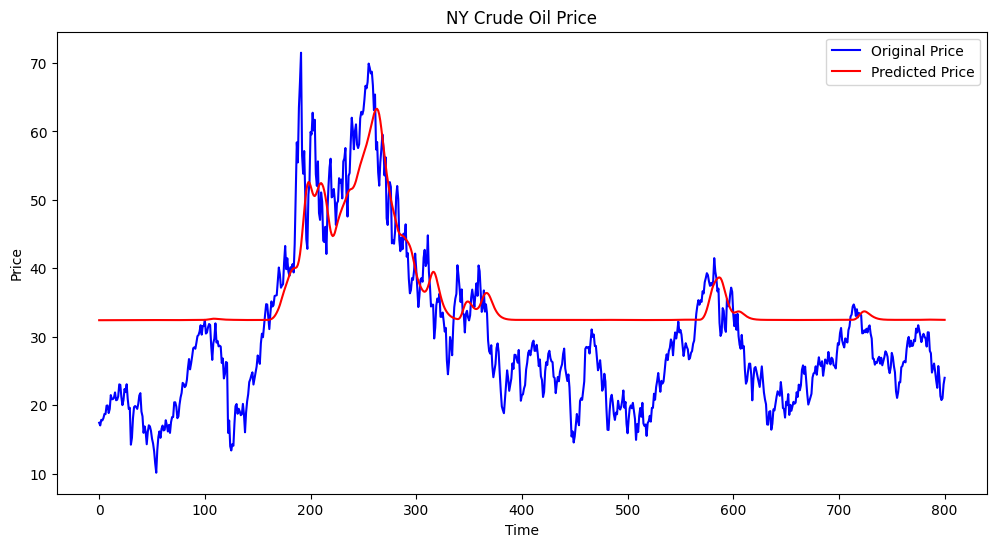

In [ ]:
plt.figure(figsize=(12,6))
plt.title('NY Crude Oil Price')
plt.plot(y_test_2, 'b', label='Original Price')
plt.plot(y_pred_2, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

This plot shows a comparison between the original NY Crude Oil prices (blue line) and the predicted prices (red line) generated by a model. Here's an explanation of the plot:

**Components of the Plot**:

1. **Original Price (Blue Line):**
   - The blue line represents the actual historical prices of NY Crude Oil over time. It reflects the day-to-day fluctuations in crude oil prices.

2. **Predicted Price (Red Line):**
   - The red line represents the prices predicted by the model. This line is the model's attempt to forecast the crude oil prices based on the training data it has been provided.

**Key Observations**:

- **Flat Predicted Line:**
  - One of the most noticeable aspects of this plot is that the predicted price (red line) is mostly flat, except for a small upward curve around the middle of the timeline. This indicates that the model is not effectively capturing the variability in the crude oil prices.
  - The flatness of the predicted line suggests that the model might have overfit or failed to learn the underlying patterns in the data. It might be predicting an average value for most of the data points rather than accurately forecasting the fluctuations.

- **Mismatch with Original Prices:**
  - The original price (blue line) shows significant volatility and large fluctuations over time. However, the predicted prices (red line) do not match these fluctuations, especially in the periods where the actual prices spike or drop sharply.
  - The model's predictions are far off from the actual values, especially during high volatility periods.

- **Potential Issues:**
  - **Model Underfitting:** The model might be underfitting, meaning it is too simplistic to capture the complexity of the actual data. This could happen if the model has too few parameters or if the training data was insufficient or not representative of the actual trends.
  - **Data Processing Issues:** There might be issues in how the data was processed or how the model was trained, leading to poor predictions.

**Purpose of the Plot**:

- **Model Evaluation:**
  - This plot is useful for evaluating the performance of the prediction model. The clear discrepancy between the original and predicted prices highlights that the model is not performing well, which might indicate a need for model refinement or retraining.

- **Identifying Issues:**
  - The plot helps in identifying that the model is not capturing the underlying trends and is instead outputting a nearly constant value. This suggests that further investigation and improvements in the model architecture or training process are necessary.


The plot indicates that the model's predictions are not aligned with the actual NY Crude Oil prices, with the predicted prices being mostly flat and not capturing the price dynamics. This suggests that the model is not effectively learning from the data and would need to be revisited for improvements.

# Comperative Analysis of Different Crude Oil Prices for Future Predictions

In [ ]:
def predict_future_prices(model, input_data, y_test, scale_factor, num_days=30):
    last_100_days = np.copy(input_data[-100:])
    predictions = []

    for _ in range(num_days):
        pred = model.predict(last_100_days.reshape(1, -1, last_100_days.shape[1]), verbose=0)
        predictions.append(pred[0, 0])
        last_100_days = np.roll(last_100_days, shift=-1, axis=0)
        last_100_days[-1] = pred

    predictions = np.array(predictions)
    predictions = predictions * scale_factor

    initial_price = predictions[0]
    final_price = predictions[-1]
    predicted_return = ((final_price - initial_price) / initial_price) * 100

    return predictions, predicted_return

## Predictions for the Next Month

In [ ]:
num_days = 30
oil_names = ["Brent Crude Oil", "NY Crude Oil"]

input_data_list = [input_data_1, input_data_2]
y_test_list = [y_test_1, y_test_2]
x_test_list = [x_test_1, x_test_2]
scale_factors = [scale_factor_1, scale_factor_2]
models = [model_1, model_2]

In [ ]:
price_changes = []

for i in range(2):
    predictions, price_change = predict_future_prices(models[i], input_data_list[i], y_test_list[i], scale_factors[i])
    if price_change > 0:
        price_changes.append((oil_names[i], price_change))

price_changes.sort(key=lambda x: x[1], reverse=True)

for oil_name, price_change in price_changes:
    print(f'{oil_name}: Predicted Change in Price {price_change:.2f}%')

Brent Crude Oil: Predicted Change in Price 14.45%
NY Crude Oil: Predicted Change in Price 3.86%


### Visualizing the Predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


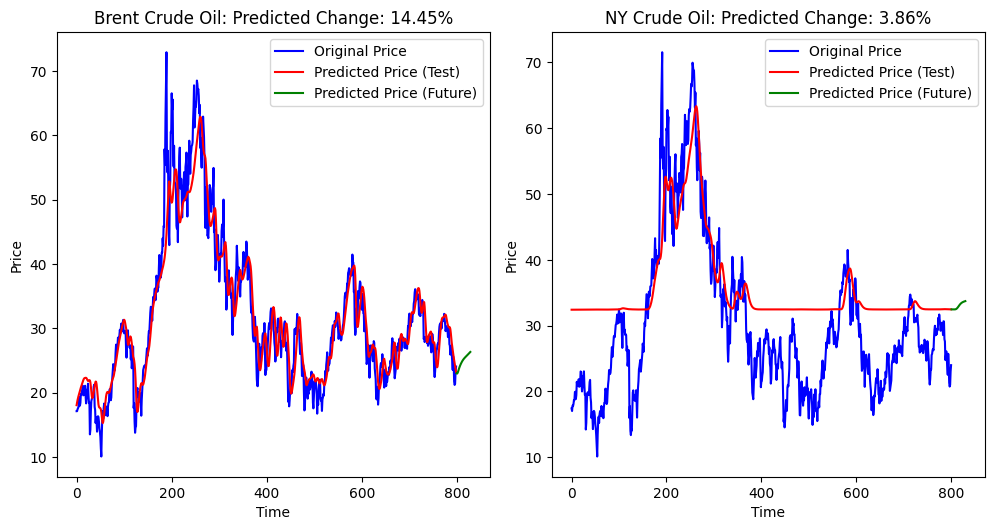

In [ ]:
predicted_changes = []

plt.figure(figsize=(15, 10))

for i in range(2):
    predictions, predicted_change = predict_future_prices(models[i], input_data_list[i], y_test_list[i], scale_factors[i])
    predicted_changes.append(predicted_change)

    future_index = np.arange(len(y_test_list[i]), len(y_test_list[i]) + num_days)

    plt.subplot(2, 3, i + 1)
    plt.plot(np.arange(len(y_test_list[i])), y_test_list[i], 'b', label='Original Price')
    plt.plot(np.arange(len(y_test_list[i])), models[i].predict(x_test_list[i]) * scale_factors[i], 'r', label='Predicted Price (Test)')
    plt.plot(future_index, predictions, 'g', label='Predicted Price (Future)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'{oil_names[i]}: Predicted Change: {predicted_change:.2f}%')

plt.tight_layout()
plt.show()

### Interpretation of the Plot

This image contains two side-by-side plots comparing the original and predicted prices of Brent Crude Oil and NY Crude Oil, along with future price predictions. Here’s a detailed breakdown of each plot:

**Left Plot: Brent Crude Oil**

- **Title:**
  - The title "Brent Crude Oil: Predicted Change: 14.45%" suggests that the model predicts a 14.45% change in the future price of Brent Crude Oil.

- **Original Price (Blue Line):**
  - The blue line represents the actual historical prices of Brent Crude Oil.

- **Predicted Price (Test) (Red Line):**
  - The red line represents the prices predicted by the model during the test phase, which is the period for which the model has made predictions based on historical data.

- **Predicted Price (Future) (Green Line):**
  - The green line shows the model's predictions for future prices beyond the test period. The small upward curve at the end of the green line suggests that the model anticipates a price increase.

- **Performance:**
  - The red line closely follows the blue line, indicating that the model performed well during the test phase. The future prediction (green line) suggests that the model expects a significant price increase, as reflected by the 14.45% predicted change.

**Right Plot: NY Crude Oil**

- **Title:**
  - The title "NY Crude Oil: Predicted Change: 3.86%" suggests that the model predicts a 3.86% change in the future price of NY Crude Oil.

- **Original Price (Blue Line):**
  - The blue line represents the actual historical prices of NY Crude Oil.

- **Predicted Price (Test) (Red Line):**
  - The red line represents the model's predictions during the test phase. Similar to the Brent Crude Oil plot, this line reflects the model's attempt to track the historical data.

- **Predicted Price (Future) (Green Line):**
  - The green line indicates the model's predictions for future prices. This line is mostly flat, with a slight upward curve, suggesting that the model expects a modest increase in the price, which is consistent with the predicted change of 3.86%.

- **Performance:**
  - The red line does not follow the blue line as closely as in the Brent Crude Oil plot, indicating that the model did not perform as well for NY Crude Oil. The flatness of the predicted line suggests the model might be underfitting or not capturing the price dynamics well, leading to a conservative future prediction.

# Conclusion

- **Comparison:**
  - The left plot (Brent Crude Oil) shows a higher predicted price change (14.45%) with the model performing well during the test phase, closely following the historical data.
  - The right plot (NY Crude Oil) shows a smaller predicted price change (3.86%) with the model performing less accurately during the test phase, indicated by the flatness of the predicted price lines.

- **Future Predictions:**
  - The model expects Brent Crude Oil prices to rise significantly in the future, while it predicts only a modest increase for NY Crude Oil.